# COMP5360 Spring 2022: Final Project
# Optical-Spectroscopic Object Classification 

## Your Data
First Name: Roanna
<br>
Last Name: Rague
<br>
E-mail: u1343169@umail.utah.edu
<br>
UID: u1343169
<br>
<br>
First Name: Alexander
<br>
Last Name: Millar
<br>
E-mail: u0740821@umail.utah.edu
<br>
UID: u0740821
<br>

# TODO: see if there is an easy way to put a Table of Contents here that has anchors to our different sections (folding would be a plus, but mostly just a take-me-to-that-section navigation)

-------

-------

# Project Description 

   Our project in summary is the classification of astronomical objects using Python. The ultimate goal of the project is to be able to pass in specific astronomical data and have our Python model return what type of astronomical object it is. The classifications of astronomical objects we chose to have is: Galaxy, Star and Quasar. When passing in the specific data points, our model should return to us what exactly the astronomical object is out of those three classifications. With this in mind, we also hope to try our model out when it is complete with other data to see if it can accurately return the correct classification of the astronomical object.  

We are using data from https://www.sdss.org/dr17/data_access/bulk and http://skyserver.sdss.org/dr17 to use for our data model. This data includes numerous data points, including right ascension angle, declination angle, ultraviolet filter, green filter, red filter, etc. With this data we can construct the classification system we need to determine the final object.  

We plan to use dimensionality reduction, such as PCA/LDA, as well as cross-validated classification/clustering methods – such as SVM (Support Vector Machine) and K-means – for our analysis methods on this data and to build our model.  

In summary, the question we are trying to answer – our hypothesis – is, what astronomical objects do we have based on the data we have been given?  

-----

-----

# Data Acquisition
# Assessment of possible data sources

-------------

## Data Description

Our data set contains numerous data points including right ascension angle, declination angle, ultraviolet filter, green filter, red filter, etc

## Flexible Image Transport System (FITS)

Our first process for acquiring the data from https://www.sdss.org/dr17/data_access/bulk involved researching and locating .fits files (Flexible Image Transport System – defines digital file format useful for storage). However, with this process, we were unable to determine exactly what the .fits files contained. For example, we were unsure with our initial data processing if one .fits file represented one data object or multiple.

#### Source in our Repository: "comp5360_final\EDA\Python\Read.py"

In [158]:
# #conda install astropy
# import astropy
# from astropy.io import fits
# from astropy.table import Table

# with fits.open('spec-10000-57346-0001.fits') as hdul:
#     print(hdul.info())
#     print(hdul[1].header)
#     print(hdul[1].data)

-------------

## Web Scraping

Our second process for acquiring data from https://www.sdss.org/dr17/data_access/bulk involved web scraping. Since we knew the data was stored here we were able to locate the specific astronomical objects here: http://skyserver.sdss.org/dr17/VisualTools . 

Upon accessing this page, we noticed there were individual links to the “PhotoObj” (imaging) and the “SpecObj” (spectra)	 

![Spec](Spec.png)
![Image](Image.png)

When we followed these links, we saw that the data was constructed as HTML tables.
![HTML](HTML.png)

So, we decided we would web scrape our data using these HTML tables, store the information and write it all out to a CSV using Python.  

However, we did run into some issues:  

Issue#1: We first checked to see if we could web scrape this website and when we noticed they had a specific API, we continued with our process. The first issue we noticed is that we could not ping the website too much, so we set up a timer to wait a second or two before querying the website again. One person queried spectral data; the other person queried image data. Once all our data had been queried, we would merge both CSVs together to have one large dataset of both the image and spectral data.  

Issue#2: After querying a few of the HTML pages, we noticed if we programmatically accessed the webpage, it would not return the correct data. Even typing in the URL by hand resulted in incorrect data. For example, where there should have been a value a “0” was always returned. At this point, we determined we had to change our course for acquiring the data again.  

#### Source in our Repository: "comp5360_final\data_acquisition\Python\web_scraping_optical_spectra_and_imaging_first_10000.py"

In [159]:
# #%% imports
# from bs4 import BeautifulSoup
# from selenium import webdriver
# import time
# from os import listdir
# from os import chdir
# import pandas as pd


# #%% SWITCHES

# #folder containing repo root
# repo_path = r'C:\Users\Bob\Desktop\U\comp5360_final'
# #repo_path = r'/Users/roannarague/Documents/BMI_6106_Final'

# #
# web_driver_path = 'C:/Users/Bob/Downloads/chromedriver_win32/chromedriver.exe'
# #web_driver_path = '/Users/roannarague/Downloads/chromedriver_win32/chromedriver.exe'

# # set FALSE for imaging data
# #want_optical_spectra = True
# want_optical_spectra = False


# #%% working directory
# chdir(repo_path)
# chdir('.\data_acquisition\Python')

# #%% data temp/out dirs
# web_scraping_dir = '../../data/web_scraping'
# data_folder = 'optical_spectra_data' if want_optical_spectra else 'imaging_data'
# data_out_dir = f'{web_scraping_dir}/{data_folder}'
# temp_html_dir = f'{web_scraping_dir}/temp_html'

# #%% out file
# data_type = 'optical_spectra' if want_optical_spectra else 'imaging_data'
# out_csv = f'{data_out_dir}/{data_type}_first_10000.csv'

# #%% read in reference data
# df = pd.read_csv('../../data/star_classification.csv')

# #%% scrape table from each spec_obj_ID's page in 1 second intervals and write to file
# optical_spectra_url = 'http://skyserver.sdss.org/dr17/VisualTools/explore/displayresults?name=SpecObjQuery'
# imaging_url = 'https://skyserver.sdss.org/dr17/VisualTools/explore/displayresults?name=PhotoObjQuery'
# spec_obj_ID_param = '&spec=' # common parameter
# obj_ID_param = '&id=' # imaging parameter

# abort = False
# no_data = []
# with webdriver.Chrome(web_driver_path) as driver:
#     for ids in df.loc[0:10000,['spec_obj_ID','obj_ID']].to_numpy():
#         specObjId = int(ids[0])
#         objId = int(ids[1])
#         query = ''
#         if want_optical_spectra:
#             query = f'{optical_spectra_url}{spec_obj_ID_param}{specObjId}'
#         else:
#             query = f'{imaging_url}{obj_ID_param}{objId}{spec_obj_ID_param}{specObjId}'
#         try:
#             driver.get(query)
#             table = driver.find_element_by_xpath('//table/..')
#             table_html = table.get_attribute('innerHTML')
#             with open(f'{temp_html_dir}/{specObjId}.html', 'w') as new_file:
#                 new_file.write(table_html)
#         except:
#             no_data.append(specObjId)
#         time.sleep(1)
#         if not abort:
#             continue
#         break
    
    
#     with open(f'{data_out_dir}/no_data_spec_Obj_Ids_first_10000.txt','w') as nd_file:
#         nd_file.write(f'{no_data}')


# #%% list all files in saved HTML directory
# pages = []
# for file in listdir(temp_html_dir):
#     with open(f'{temp_html_dir}/{file}', encoding='utf-8') as f:
#         pages.append(BeautifulSoup(f.read(), 'html.parser'))


# #%% hacky way to visualize first page contents
# len(pages)
# pg = pages[0]
# pg.text.replace('\n',' ').replace('   ',',')[2:3424].replace(' ',': ').split(',') # run line for clean visual


# #%% extract key/value pairs from each page into list of dicts
# spec_obj_dictionaries = []
# pg_idx = 0
# for page in pages:
#     try:
#         pdict = {}
#         for row in page.select('tr'):
#             field = row.select('tr > th > span')[0].text
#             value = row.select('tr > td')[0].text
#             if field == 'img':
#                 break
#             pdict[field]=value
#         spec_obj_dictionaries.append(pdict)
#     except Exception as e:
#         print(f'Broke on page index {pg_idx} due to {str(e)}')
#     pg_idx += 1

        
# #%% check successful scrapes weren't all GALAXY
# sdf = pd.DataFrame(spec_obj_dictionaries)
# #print(sdf['class'].value_counts()) not all team members' scrape designations have class
# #sdf['spec_obj_ID']...

# # TODO: RO PR -> df.iloc[0] =>
# # obj_ID         1237660961327743232.0
# # alpha                     135.689107
# # delta                      32.494632
# # u                           23.87882
# # g                            22.2753
# # r                           20.39501
# # i                           19.16573
# # z                           18.79371
# # run_ID                          3606
# # rerun_ID                         301
# # cam_col                            2
# # field_ID                          79
# # spec_obj_ID    6543777369295181824.0
# # class                         GALAXY
# # redshift                    0.634794
# # plate                           5812
# # MJD                            56354
# # fiber_ID                         171

# # 6543777369295181824.html written to disk has specObjID of 0
# #
# # fortunately, the file name has this ID and in memory list of soup, 
# # but I am concerned about the values 
# # (e.g. 'u'='23.87882' (above) vs sdf.iloc[0].u=='23.78062') 
# # in cases where we get this specObjId

# #%% save to disk for team merge
# sdf.to_csv(out_csv)

# #%% check
# test = pd.read_csv(out_csv)

-------------

## Web Querying

Finally our third process for acquiring data from https://www.sdss.org/dr17/data_access/bulk, involved using a special tool on the website: https://skyserver.sdss.org/dr17/CrossMatchTools/ObjectCrossID. This tool allowed us to query the data directly on the website using SQL. We were able to check the correct search types we needed and write the data out as a final CSV file.  

![CrossID](CrossID.png)


However, we also ran into some issues: 

Issue#1: The data returned resulted in massive files, so we had to do 10 runs of this query to get all our data. Then we merged all the CSV files together 

Issue#2: When we had our final dataset, we noticed there were only two classifications: stars and galaxies. But no quasars. For this database, these were the only two classifications. To fix this issue, we used: https://skyserver.sdss.org/dr17/SearchTools/sql# to write a direct SQL query for Quasars. This returned a CSV file of just quasars where we then matched the “spec_obj_id” with the “spec_obj_id” in our initial dataset (with just galaxies and stars) and re-classified any of them that had a matching “spec_obj_id” in the quasar CSV.  

![SQL](SQL.png)

#### Source in our Repository: "comp5360_final\data_acquisition\Python\web_query_file_builder.py"

In [160]:
# #%% Imports

# import numpy as np
# import pandas as pd
# from os import chdir


# #%% working directory

# #folder containing repo root
# repo_path = r'C:\Users\Bob\Desktop\U\comp5360_final'
# #repo_path = r'/Users/roannarague/Documents/BMI_6106_Final'

# chdir(repo_path)

# chdir('./data_acquisition/Python')


# #%% read in reference data
# df = pd.read_csv('../../data/star_classification.csv')


# #%%% build 
# out_dir = '../../data/skyserver_querying'

# num_chunks = 10
# num_objs = df.shape[0]
# chunk_size = int(num_objs / num_chunks)

# for i in range(num_chunks):    
#     ra_dec = []
#     ra_dec.append('  name  ra         dec\n')
#     idx = 0
#     start = chunk_size * i
#     end = start + chunk_size - 1
#     if num_chunks == i + 1:
#         end += 1
#     for ids in df.loc[start:end,['alpha', 'delta']].values:
#         idx += 1
#         xname = hex(idx)[2:]
#         ra_dec.append(f'  {xname:<4}  {ids[0]:<19}  {ids[1]}\n')        
    
#     with open(f'{out_dir}/ra_dec_{start}-{end}.txt','w') as f:
#         f.writelines(ra_dec)

---------------------

-------

---------------------

## Clean up concatenated Web Query data
## Check data for issues

#### Source in our Repository: "comp5360_final\data_acquisition\Python\clean_and_compare_ref_vs_final_combined_csv.py"

In [161]:
# #%% Imports

# import numpy as np
# import pandas as pd
# from os import chdir


# #%% working directory

# #folder containing repo root
# repo_path = r'C:\Users\Bob\Desktop\U\comp5360_final'
# #repo_path = r'/Users/roannarague/Documents/BMI_6106_Final'

# chdir(repo_path)

# chdir('./data_acquisition/Python')


# #%% read in reference data
# df = pd.read_csv('../../data/star_classification.csv')


# #%% clean up join of queries

# def FreshValDf():    
#     t = pd.read_csv('../../data/skyserver_querying/final_combined.csv', skiprows=1)
    
#     cols = t.columns.to_numpy()
#     # ['name', 'objID', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field','type', ...
    
#     # drop 'name' per artifact of query
#     t = t.drop('name', axis=1)
    
#     cols = t.columns.to_numpy()
#     # ['objID', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field','type', 'modelMag_u', 'modelMag_g', 'modelMag_r', 
#        'modelMag_i', 'modelMag_z', 'specObjID', 'plate', 'mjd', 'fiberID']
    
#     len(t.specObjID.unique())
#     #126598
    
#     t.shape
#     #(128429, 19)
    
#     t.shape[0] - len(t.specObjID.unique())
#     #1831
    
#     val_cnts = t.specObjID.value_counts()
#     val_cnts.reset_index().iloc[0]
#     # index        specObjID
#     # specObjID            9
    
#     #remove header rows (from joining queries)
#     rows_to_drop_idx = t[t['specObjID']=='specObjID'].index
#     t = t.drop(rows_to_drop_idx)
    
#     #check ref and val data for matching spec_obj_IDs
    
#     # all duplicated specObjID rows have sames values in all columns
#     t.duplicated().sum()
#     # 1823 (doesn't include first occurrence)
#     len(t) - t.duplicated().sum()
#     # 128420 - 1823 = 126597

#     t = t.drop(t.loc[t.duplicated()].index)

#     len(t)
#     # 126597
#     len(t['specObjID'].unique())
#     # 126597
#     return t


# tdf = FreshValDf()


# #%% subset ref and val data by matching spec_obj_IDs

# ref_spec_obj_ids = df['spec_obj_ID'].to_numpy()
# val_spec_obj_ids = tdf['specObjID'].astype(float).to_numpy()

# spec_obj_ids_from_val_in_ref = val_spec_obj_ids[np.in1d(val_spec_obj_ids, ref_spec_obj_ids)]
# len(spec_obj_ids_from_val_in_ref)
# #71155

# ref_spec_obj_ids = df['spec_obj_ID'].apply(lambda x: str(int(x))).to_numpy()
# val_spec_obj_ids = tdf['specObjID'].to_numpy()

# spec_obj_ids_from_val_in_ref = val_spec_obj_ids[np.in1d(val_spec_obj_ids, ref_spec_obj_ids)]
# len(spec_obj_ids_from_val_in_ref)
# #71155

# # subset queried data (common soi w/ref data)
# df_val_subset = tdf[tdf['specObjID'].isin(spec_obj_ids_from_val_in_ref)]
# df_val_subset.shape

# # subset ref data
# soi_float = spec_obj_ids_from_val_in_ref.astype(float)
# df_ref_subset = df[df['spec_obj_ID'].isin(soi_float)]
# df_ref_subset.shape


# #%% look at data types/values to decide what makes sense

# def prnt(df):
#     print()
#     idx = df.dtypes.index
#     dt = df.dtypes
#     val = df.iloc[0]
#     for i in range(len(val)):
#         typ = str(dt[i])
#         print(f'{typ:<10}  {idx[i]:<15}{val[i]:>24}')
#     print()
    
# prnt(df_ref_subset)
# # float64     obj_ID           1.2376609613277432e+18
# # float64     alpha                    135.6891066036
# # float64     delta                  32.4946318397087
# # float64     u                              23.87882
# # float64     g                               22.2753
# # float64     r                              20.39501
# # float64     i                              19.16573
# # float64     z                              18.79371
# # int64       run_ID                             3606
# # int64       rerun_ID                            301
# # int64       cam_col                               2
# # int64       field_ID                             79
# # float64     spec_obj_ID       6.543777369295182e+18
# # object      class                            GALAXY
# # float64     redshift                      0.6347936
# # int64       plate                              5812
# # int64       MJD                               56354
# # int64       fiber_ID                            171

# prnt(df_val_subset)
# # object      objID               1237660961327743273
# # object      ra                       135.6891066036
# # object      dec                    32.4946318397087
# # object      run                                3606
# # object      rerun                               301
# # object      camcol                                2
# # object      field                                79
# # object      type                             GALAXY
# # object      modelMag_u                     23.87882
# # object      modelMag_g                      22.2753
# # object      modelMag_r                     20.39501
# # object      modelMag_i                     19.16573
# # object      modelMag_z                     18.79371
# # object      specObjID           6543777369295181824
# # object      plate                              5812
# # object      mjd                               56354
# # object      fiberID                             171
# # object      z                             0.6347936

# modelMag ~ (de Vaucouleurs magnitude fit || Exponential fit magnitude), better of DeV/Exp magnitude fit

# #%% match up
# def ConvertToMatchRef(d):
#     d['redshift'] = d['z']
#     d['class'] = d['type']
#     d['spec_obj_ID'] = d['specObjID']
#     d['obj_ID'] = d['objID']
#     d['alpha'] = d['ra'].astype(float)
#     d['delta'] = d['dec'].astype(float)
#     d['u'] = d['modelMag_u'].astype(float)
#     d['g'] = d['modelMag_g'].astype(float)
#     d['r'] = d['modelMag_r'].astype(float)
#     d['i'] = d['modelMag_i'].astype(float)
#     d['z'] = d['modelMag_z'].astype(float)
    
    
#     d = d.drop(['type'], axis=1)
#     d = d.drop(['ra'], axis=1)
#     d = d.drop(['dec'], axis=1)
#     d = d.drop(['modelMag_u'], axis=1)
#     d = d.drop(['modelMag_g'], axis=1)
#     d = d.drop(['modelMag_r'], axis=1)
#     d = d.drop(['modelMag_i'], axis=1)
#     d = d.drop(['modelMag_z'], axis=1)
    
#     d['run_ID'] = d['run'].astype(int)
#     d['rerun_ID'] = d['rerun'].astype(int)
#     d['cam_col'] = d['camcol'].astype(int)
#     d['field_ID'] = d['field'].astype(int)
#     d['plate'] = d['plate'].astype(int)
#     d['MJD'] = d['mjd'].astype(int)
#     d['fiber_ID'] = d['fiberID'].astype(int)
    
#     d = d.drop(['objID','specObjID', 'run', 
#                 'rerun', 'camcol', 'field', 
#                 'mjd', 'fiberID'], axis=1)
#     return d
    
# #%%
# df_val_subset = ConvertToMatchRef(df_val_subset)

# #%% check
# prnt(df_val_subset)
# prnt(df_ref_subset)
# print(df_val_subset.shape)
# print(df_ref_subset.shape)

# #%% write
# df_val_subset.to_csv('final_combined_clean_subset_matching_ref.csv')



# #%% NO QUASARS?
# df_val_subset['class'].value_counts()


# #%%
# print(df['class'].value_counts())

# #%% YUP, NO QUASARS!

# df_val = FreshValDf()
# df_val['type'].value_counts()
# df_val = df_val.drop(df_val[df_val.isna().any(axis=1)].index)
# ddd = ConvertToMatchRef(df_val)
# prnt(ddd)
# print(ddd['class'].value_counts())

# t = pd.read_csv('../../data/skyserver_querying/final_combined.csv', skiprows=1)
# t['type'].value_counts()

### Found that we had no Quasar data
### Peer Review verified no Quasar data
#### Queried https://skyserver.sdss.org/dr17/CrossMatchTools/ObjectCrossID for only Quasars ("Quasars2.csv")
#### Matched `spec_obj_ID` to previously queried astronomical objects (Quasars mostly over-generalized as `STAR`)

#### Source in our Repository: "comp5360_final\data_acquisition\Python\SetQuasars.py"

In [162]:
# ## Part 1a: Read in initial final combined csv (the one with no Quasars)

# # imports and setup 
# import pandas as pd
# import numpy as np
# import os


# #set working directory
# os.chdir('/Users/roannarague/Downloads')
# #os.chdir('/Users/Bob/Desktop/u/comp5360_final/data_acquisition/Python/')

# #read in the final_combined csv (with no quasars)
# # renamed final_combined_clean_subset_matching_ref.csv to shorten
# df_combined = pd.read_csv('/Users/roannarague/Downloads/final_combined_3.csv')
# #df_combined = pd.read_csv('./final_combined_3.csv')

# #print a few lines
# #df_combined.head()

# #check out all our spec ob IDs
# #print(df_combined['spec_obj_ID'])


# ## PART 1b: Read in our ALL Quasar CSV data

# #read in the final_combined csv (with no quasars)
# df_qso = pd.read_csv('/Users/roannarague/Downloads/Quasars2.csv')
# #df_qso = pd.read_csv('./Quasars2.csv')

# #print a few lines
# #df_qso.head()

# #print columns
# #print(df_qso.columns.tolist())

# #create new dataframe of just spec obj ids
# df_specs = pd.DataFrame().assign(specObjID=df_qso['specObjID'])

# #df_specs.head()

# #create a numpy array out of this new dataframe
# specID_array = df_specs.to_numpy()

# #print(specID_array)


# # PART 2: Iterate through our final_combined_3.csv to find specObjIDs that match our Quasar specObjIDs

# ## PART 2a: iterate through our df_combined dataframe and start comparing specObjIDs to find matches

# #iterate through our df_combined dataframe

# #create a variable to store our first quasar spec id we find so we can validate later
# firstQSOSpecID = 0

# #print("================= SpecObjID ========== Class ======")
# for index, row in df_combined.iterrows():
#     #print("index: " , index, " --> ", row['spec_obj_ID'], " " ,row['class'])
#     #print(row['spec_obj_ID'])
#     if row['spec_obj_ID'] in specID_array:
#         firstQSOSpecID = row['spec_obj_ID']
        
#         #print our old row
#         #print("===================== ROW =====================")
#         #print("OLD Row: ", "index: ", index, "Row: ", row['spec_obj_ID'], " CLASS: ", row['class'])
        
#         #so now we have to change the class type from whatever it was to QSO == Quasar
#         df_combined.at[index,'class']='QSO'
        
#         #print our new row
#         #print("NEW Row: ", "index: ", index, "Row: ", row['spec_obj_ID'], " CLASS: ", row['class'])

# #DOUBLE CHECKING DOWN HERE to make sure that it actually was in the quasar numpy array
# #for i in specID_array:
#     #if i == firstQSOSpecID:
#         #print("Successful Test #1!")
#         #print(i, " == ", firstQSOSpecID)
        

# # PART 3: Write to a new final_combined_QSO.csv file

# ## PART 3a: Write a new csv file with Quasars in it

# #first let's take a look at our dataframe head again:
# #for index, row in df_combined.iterrows():
#     #if row['class'] == 'QSO':
#         #print("index: " , index, " --> ", row['spec_obj_ID'], " " ,row['class'])
        

# #Write to a csv file 
# df_combined.to_csv('/Users/roannarague/Downloads/final_combined_QSO_1.csv')
# #df_combined.to_csv('./final_combined_QSO_1.csv')


# # PART 4: re-read in our new combined csv file with quasars

# #read in the final_combined csv (with quasars)
# df_combined_QSO = pd.read_csv('/Users/roannarague/Downloads/final_combined_QSO_1.csv')
# #df_combined_QSO = pd.read_csv('./final_combined_QSO_1.csv')

# #print a few lines
# #df_combined_QSO.head()
# print(df_combined_QSO.groupby('class').count())


# df_combined['class'].value_counts()

#### Remove index columns and exclude in output CSV

In [163]:
# df = pd.read_csv('../../../comp5360_final/data_acquisition/Python/final_combined_QSO_1.csv')
# print(df.head(1))
# #   Unnamed: 0  Unnamed: 0.1  plate         z  redshift   class   ...
# #0           0             0   5812  18.79371  0.634794  GALAXY   ...
# df = df.drop(df.columns[0:2], axis=1)
# df.to_csv('../../data/optical_spectroscopic_object_classification.csv', index=False)
# df = pd.read_csv('../../data/optical_spectroscopic_object_classification.csv')
# df.head(1)
# # plate         z  redshift   class          spec_obj_ID   ...

### Query 100,000 Optical Spectroscopic Objects for Test
-----
Lastly, we queried 100,000 objects with a fair degree of similarity--ensuring GALAXY/STAR/QUASAR--to our train objects for model test.

##### Source in our Repository: "comp5360_final\data\star_classification_test.csv"
##### Source in our Repository: "comp5360_final\data\star_classification_test_readme.txt"

In [164]:
# source:
# https://skyserver.sdss.org/dr17/SearchTools/sql

# SQL:
# -- This query does a table JOIN between the imaging (PhotoObj) and spectra
# --(SpecObj) tables and includes the necessary columns in the SELECT to upload
# --the results to the SAS(Science Archive Server) for FITS file retrieval.
# SELECT TOP 100000
# p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
# p.run, p.rerun, p.camcol, p.field,
# s.specobjid, s.class, s.z as redshift,
# s.plate, s.mjd, s.fiberid
# FROM PhotoObj AS p
# JOIN SpecObj AS s ON s.bestobjid = p.objid
# WHERE 
#   p.u BETWEEN 10.99 AND 32.8
#   AND g BETWEEN 10.49 AND 31.61
#   AND p.i BETWEEN 9.45 AND 32.15
#   AND p.z BETWEEN 9.6 AND 29.39
#   AND s.z BETWEEN -0.0099 AND 7.012
#   AND s.mjd BETWEEN 51607 AND 58933

Final notes: After our process of acquiring data, we finally retrieved a usable dataset of ~100,000 objects to use for building our Python model. 

-----

-----

# Ethical Data Concerns

Something to consider would be why some of the data was classified as a quasar and then as a galaxy/star? As mentioned above, the classification rules change over time. Get a percentage of how many astronomical objects were later classified as quasar instead of a star/galaxy. 

-----

-----

# Methods

For our model, we are going to use Python and we are going to utilize the following methods:  

- Dimensionality reduction – PCA/LDA 

- Cross validated classification/clustering -- SVM and K-means 

-----

## Dimensionality Reduction

TODO: writeup about why dimensionality reduciton is important to visualize and understand high dimensional data. For example, we have up to 17 dimensions to potentionally use to predict our 1 dimension of `class`

-----

In [188]:
# imports and setup 

import numpy as np

import pandas as pd
pd.set_option('display.notebook_repr_html', False)

from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import homogeneity_score, v_measure_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'], 'GALAXY, QSO, STAR')
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import seaborn as sns

-----

### Load Data

In [189]:
df = pd.read_csv('data/star_classification.csv')

In [190]:
df.columns.values

array(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class',
       'redshift', 'plate', 'MJD', 'fiber_ID'], dtype=object)

### Variables

- `obj_ID`
    - unique identifier for the object in the image catalog used by CAS (Catalog Archive Server)
- `alpha`
    - right ascension angle (similar to longitude)
- `delta`
    - declination angle (similar to latitude)
- `u`
    - ultraviolet filter (photometric system)
- `g`
    - green filter (photometric system)
- `r`
    - red filter (photometric system)
- `i`
    - near infrared filter (photometric system)
- `z`
    - infrared filter (photometric system)
- `run_ID`
    - identifier for the specific scan
- `rereun_ID`
    - identifier specifying how the image was processed
- `cam_col`
    - camera column (identifies the scanline within run)
- `field_ID`
    - identifier specifying each field
- `spec_obj_ID`
    - unique optical spectroscopic object identifier
- `class`
    - class of optical spectroscopic object (e.g. GALAXY, STAR, QUASAR)
- `redshift`
    - based on the increase in wavelength
- `plate`
    - identifier of plate in SDSS
- `MJD`
    - modified julian date (date of observation)
- `fiber_ID`
    - identifier of the fiber pointing light at the focal plane (for observation)


### What Variables May Contain Information

In [191]:
df.describe()

             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      1

-----

##### `rerun_ID` is constant (`std` == 0) and can thereby be removed

##### `obj_ID` & `spec_obj_ID`, aside from having high Standard Deviation (`std`) are assigned to specific parent objects and spectroscopic objects for identification. These values are arbitrary and do not contain observable information about the underlying object being observed. Additionally, they may have some relation to the class of the object and thereby have the potential to confound downstream analyses/predictions and should therefore be dropped.

-----

In [192]:
df = df.drop('rerun_ID', axis=1)
df = df.drop('obj_ID', axis=1)
df = df.drop('spec_obj_ID', axis=1)

In [193]:
df.describe()

               alpha          delta              u              g  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      177.629117      24.135305      21.980468      20.531387   
std        96.502241      19.644665      31.769291      31.750292   
min         0.005528     -18.785328   -9999.000000   -9999.000000   
25%       127.518222       5.146771      20.352353      18.965230   
50%       180.900700      23.645922      22.179135      21.099835   
75%       233.895005      39.901550      23.687440      22.123767   
max       359.999810      83.000519      32.781390      31.602240   

                   r              i              z         run_ID  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       19.645762      19.084854      18.668810    4481.366060   
std         1.854760       1.757895      31.728152    1964.764593   
min         9.822070       9.469903   -9999.000000     109.000000   
25%        18.135828      17.7322

##### `u`, `g`, and `z` have an outstanding `min` of `-9999`, investigate how prevalent

In [194]:
df[((df.u==-9999) | (df.g==-9999) | (df.z==-9999))]

            alpha     delta       u       g        r         i       z  \
79543  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675 -9999.0   

       run_ID  cam_col  field_ID class  redshift  plate    MJD  fiber_ID  
79543     752        2       537  STAR  0.000089   3314  54970       162  

-----
### It appears there is a single outlier, which will heavily impact a variety of parametric methods (e.g. PCA).

-----
### What type of effect is the having on the relationship of the variables? Should we drop the outlier?
-----

##### Correlation Matrix with and without Outlier

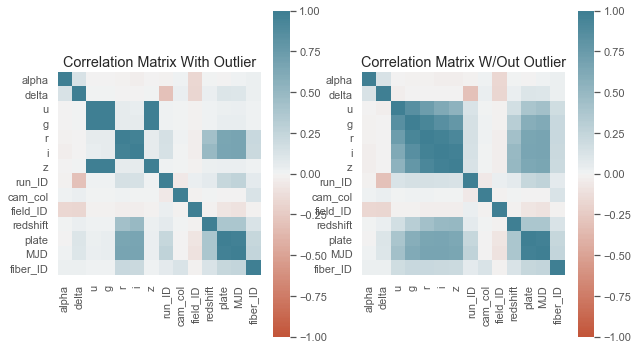

In [195]:
rb_diverging = sns.diverging_palette(20,220, n=200)
fig,axs = plt.subplots(1,2)

sns.heatmap(df.corr(), 
            center=0, 
            vmin=-1, 
            vmax=1, 
            square=True, 
            cmap=rb_diverging, 
            ax=axs[0]).set_title('Correlation Matrix With Outlier')
sns.heatmap(df.drop(79543).corr(), 
            center=0, 
            vmin=-1, 
            vmax=1,
            square=True,
            cmap=rb_diverging,
            ax=axs[1]).set_title('Correlation Matrix W/Out Outlier')
print()

-----
##### We can see that the outlier is having a significant impact on the relationship among variables and should be dropped

-----

In [196]:
df = df.drop(79543)
df.describe()

              alpha         delta             u             g             r  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     177.628653     24.135552     22.080679     20.631583     19.645777   
std       96.502612     19.644608      2.251068      2.037384      1.854763   
min        0.005528    -18.785328     10.996230     10.498200      9.822070   
25%      127.517698      5.147477     20.352410     18.965240     18.135795   
50%      180.900527     23.646462     22.179140     21.099930     20.125310   
75%      233.895005     39.901582     23.687480     22.123775     21.044790   
max      359.999810     83.000519     32.781390     31.602240     29.571860   

                  i             z        run_ID       cam_col      field_ID  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean      19.084865     18.768988   4481.403354      3.511625    186.127011   
std        1.757900      1.765982   1964.739021    

In [197]:
df.describe().T.style.background_gradient(cmap=cmap_bold)

,count,mean,std,min,25%,50%,75%,max
alpha,99999.000000,177.628653,96.502612,0.005528,127.517698,180.900527,233.895005,359.999810
delta,99999.000000,24.135552,19.644608,-18.785328,5.147477,23.646462,39.901582,83.000519
u,99999.000000,22.080679,2.251068,10.996230,20.352410,22.179140,23.687480,32.781390
g,99999.000000,20.631583,2.037384,10.498200,18.965240,21.099930,22.123775,31.602240
r,99999.000000,19.645777,1.854763,9.822070,18.135795,20.125310,21.044790,29.571860
i,99999.000000,19.084865,1.757900,9.469903,17.732280,19.405150,20.396510,32.141470
z,99999.000000,18.768988,1.765982,9.612333,17.460830,19.004600,19.921120,29.383740
run_ID,99999.000000,4481.403354,1964.739021,109.000000,3187.000000,4188.000000,5326.000000,8162.000000
cam_col,99999.000000,3.511625,1.586913,1.000000,2.000000,4.000000,5.000000,6.000000
field_ID,99999.000000,186.127011,149.007687,11.000000,82.000000,146.000000,241.000000,989.000000


In [198]:
df.describe(include=object)

         class
count    99999
unique       3
top     GALAXY
freq     59445

In [176]:
df.corr().style.background_gradient(cmap=cmap_bold)

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
alpha,1.000000,0.138698,-0.000222,-0.014118,-0.022079,-0.023577,-0.025160,-0.013728,0.019587,-0.165593,0.001671,-0.002551,0.019945,0.030469
delta,0.138698,1.000000,-0.026845,-0.007077,-0.006845,-0.004488,-0.006286,-0.301270,0.032553,-0.173393,0.031629,0.112322,0.107330,0.028237
u,-0.000222,-0.026845,1.000000,0.853350,0.728681,0.618346,0.545760,0.131566,0.007673,-0.013365,0.166816,0.395854,0.436346,0.183174
g,-0.014118,-0.007077,0.853350,1.000000,0.932996,0.847046,0.775302,0.151477,0.007828,-0.022149,0.318910,0.584315,0.610809,0.220396
r,-0.022079,-0.006845,0.728681,0.932996,1.000000,0.962868,0.919114,0.153878,0.008472,-0.026405,0.433237,0.655242,0.671180,0.223100
i,-0.023577,-0.004488,0.618346,0.847046,0.962868,1.000000,0.971546,0.147660,0.007609,-0.026665,0.492381,0.661639,0.672522,0.214782
z,-0.025160,-0.006286,0.545760,0.775302,0.919114,0.971546,1.000000,0.140461,0.006416,-0.026377,0.501060,0.644331,0.653784,0.203730
run_ID,-0.013728,-0.301270,0.131566,0.151477,0.153878,0.147660,0.140461,1.000000,-0.047117,0.031544,0.065386,0.239453,0.262685,0.067147
cam_col,0.019587,0.032553,0.007673,0.007828,0.008472,0.007609,0.006416,-0.047117,1.000000,-0.015662,0.000089,-0.001955,-0.006748,0.121588
field_ID,-0.165593,-0.173393,-0.013365,-0.022149,-0.026405,-0.026665,-0.026377,0.031544,-0.015662,1.000000,-0.021313,-0.083459,-0.095059,-0.012312


### Split `y` (response) and `X` (predictors)

In [199]:
y = df['class']
X = df.drop('class', axis=1)
X.columns.values

array(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col',
       'field_ID', 'redshift', 'plate', 'MJD', 'fiber_ID'], dtype=object)

### What Classes are present

In [200]:
print(y.value_counts().index.values)

['GALAXY' 'STAR' 'QSO']


-----

The dataset contains 14 features (attributes) corresponding to 3 different types of Optical-Spectroscopic Object. 

**Features (attributes):**
+ alpha
+ delta
+ u
+ g
+ r 
+ i
+ z
+ run_ID
+ cam_col
+ field_ID
+ redshift
+ plate
+ MJD
+ fiber_ID

**Classes:**
+ GALAXY
+ STAR
+ QSO (QUASAR)

-----

### Center/Scale the Data

In [201]:
X_df = pd.DataFrame(X).apply(scale)
X = scale(X)

### Encode Class

In [202]:
# hold on to le to allow easy decoding as needed
le = LabelEncoder().fit(y)
y_num = le.transform(y)

### Check Correlation Matrix Prior to PCA

In [203]:
X_df['class_num'] = y_num

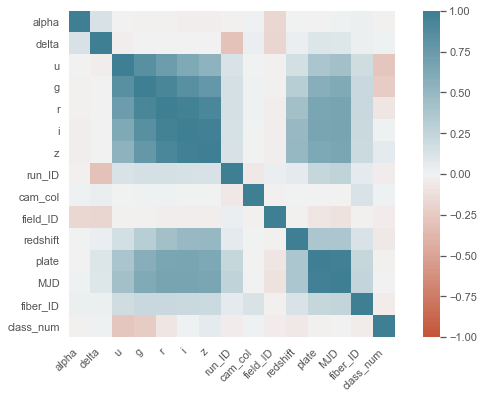

In [204]:
ax = sns.heatmap(X_df.corr(), center=0, vmin=-1, vmax=1, square=True, cmap=rb_diverging)
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right', rotation=45)
print()

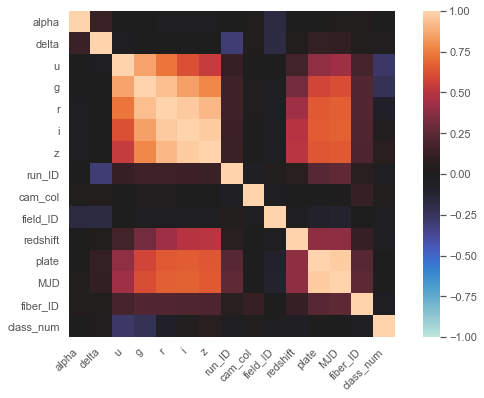

In [205]:
ax = sns.heatmap(X_df.corr(), center=0, vmin=-1, vmax=1, square=True)
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right', rotation=45)
print()

KeyboardInterrupt: 

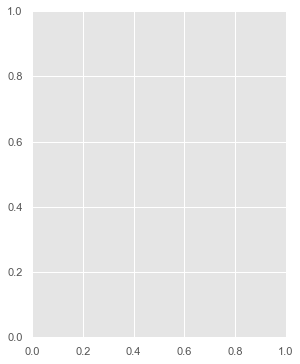

In [184]:
fig,axs = plt.subplots(1,2)

ax = sns.heatmap(X_df.corr(), center=0, vmin=-1, vmax=1, square=True, cmap=rb_diverging, ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right', rotation=45)
ax = sns.heatmap(X_df.corr(), center=0, vmin=-1, vmax=1, square=True, ax=axs[1])
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right', rotation=45)
print()

In [206]:
X_df = X_df.drop('class_num', axis=1)

TODO: remove correlated variables believed to represent same underlying trend, if any, before PCA per will amplify variance and dominate PC1

## PCA

-----

Principal Component Analysis (PCA) is an often-used tool in astronomy and stellar classification. It helps with the trial-and-error process, meaning it finds the most interesting linear coreelations of the variables. Can do either 2D or 3D plots.

#### Need to select correct amount of scaled components

In [207]:
pca_scaled_1 = PCA(n_components = 0.95)
pca_scaled_1.fit(X)
reduced_data = pca_scaled_1.transform(X)
print('Original Dimensions: ',X.shape)  
print('Reduced Dimensions: ',reduced_data.shape) 

Original Dimensions:  (99999, 14)
Reduced Dimensions:  (99999, 9)


##### <i> So what this means is that 95% of variance is observed by 9 dimensions<i/>

#### Now we can select the correct amount of components

##### So let's create a plot to visualize this data, basically I want to see the component cutoff point by creating a plot with our 95% threhold line, and wherever our 'component line' crosses is the amount of components we should choose

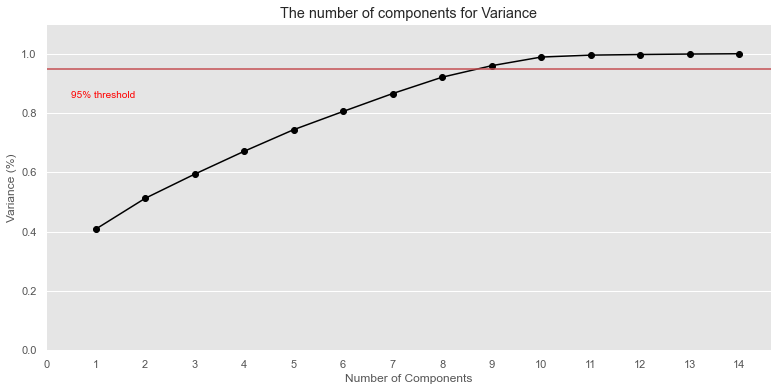

In [208]:
pca_2_plot = PCA().fit(X)
plt.rcParams["figure.figsize"] = (13,6)
fig, ax = plt.subplots()
x = np.arange(1, 15, step=1)
y = np.cumsum(pca_2_plot.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(x, y, marker='o', linestyle='-', color='black')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 15, step=1)) #change to 1 based
plt.ylabel('Variance (%)')
plt.title('The number of components for Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% threshold', color = 'red', fontsize=10)
ax.grid(axis='x')
plt.show()

#### Create our PCA on our scaled data

In [209]:
pca = PCA(n_components=9)
X_pca_nine = pca.fit_transform(X)

#### Create a Scree Plot

##### The scree plot will show us how much variance each component has on the data. This way we can see which components we actually need for our final PCA. Whatever components don't capture most of the information then we can ignore them.

In [210]:
#print our variance
print('----- VARIANCE ----')
print(pca.explained_variance_)

#now print the ratio
print('----- RATIO -----')
print(pca.explained_variance_ratio_)



----- VARIANCE ----
[5.71484359 1.45721281 1.14195913 1.08035967 1.02027689 0.86192915
 0.84450327 0.7722561  0.54279451]
----- RATIO -----
[0.40819903 0.10408559 0.08156769 0.07716778 0.07287619 0.06156575
 0.06032106 0.0551606  0.03877065]


#### SCREE PLOT

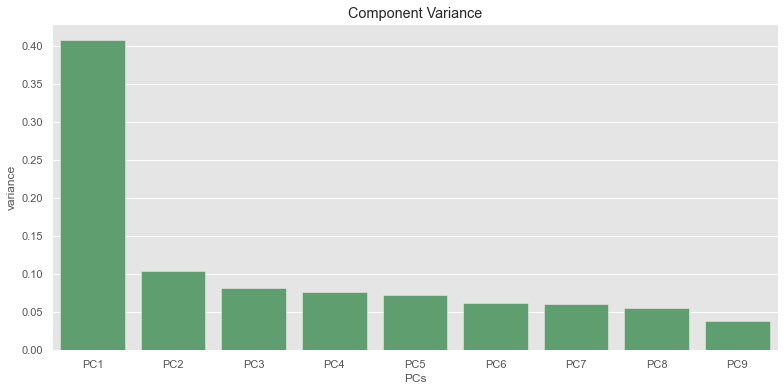

In [211]:
scree_plot = pd.DataFrame({'variance':pca.explained_variance_ratio_,'PCs':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})
sns.barplot(x='PCs',y="variance",data=scree_plot, color="g").set_title('Component Variance');

#### Interpretation of Scree Plot: 
This shows that it looks like the first 3 components contain the most valuable information of our data. 

#### Take a look at the correlations between the original data and each component

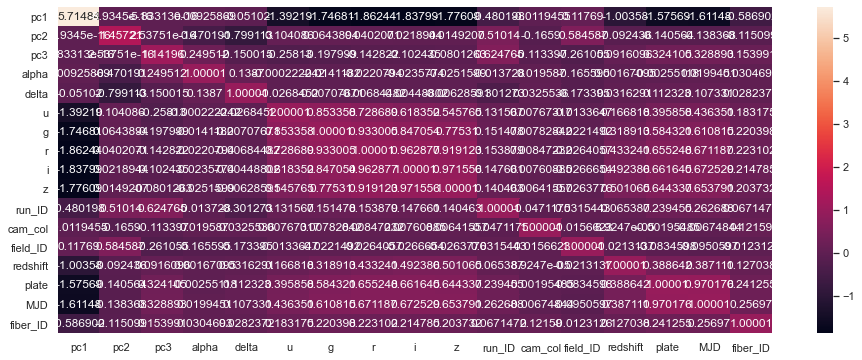

<Figure size 2016x2016 with 0 Axes>

In [212]:
#create a new data farme with our PCA
pc_rem = pd.DataFrame(data = X_pca_nine, columns = ['pc1','pc2','pc3','pc4','pc5',
                                                  'pc6','pc7','pc8','pc9'])

#drop the components we established above that we do not need
pc_rem=pc_rem.drop(['pc4'],axis=1)
pc_rem=pc_rem.drop(['pc5'],axis=1)
pc_rem=pc_rem.drop(['pc6'],axis=1)
pc_rem=pc_rem.drop(['pc7'],axis=1)
pc_rem=pc_rem.drop(['pc8'],axis=1)
pc_rem=pc_rem.drop(['pc9'],axis=1)


pc_col = pd.concat([pc_rem, X_df], axis=1)
pc_col
corrMat = pd.DataFrame.cov(pc_col)
sns.set(rc={'figure.figsize':(16,6)})
sns.heatmap(corrMat, annot=True, fmt='g')
plt.figure(figsize=(28,28))
plt.show()

#### Explain the Components observed
<b> PC1 </b>— The first component is negatively correlated with eight of the original variables. It decreases with <i> MJD </i>, <i> plate </i>, <i> red-shift </i>, <i> z <i/>, <i> i </i>, <i> r </i>, <i> g </i> , <i> u </i>

<b> PC2 </b> — The second component increases with two of the original varaibles. It increases with <i>field_ID </i> , <i> run_ID </i> 

<b>PC3 </b> — The third  component increases with only one of the values, increasing on <i> run_ID </i> 

#### Scatter plot (PC1 vs PC2 or PC1 vs PC3)

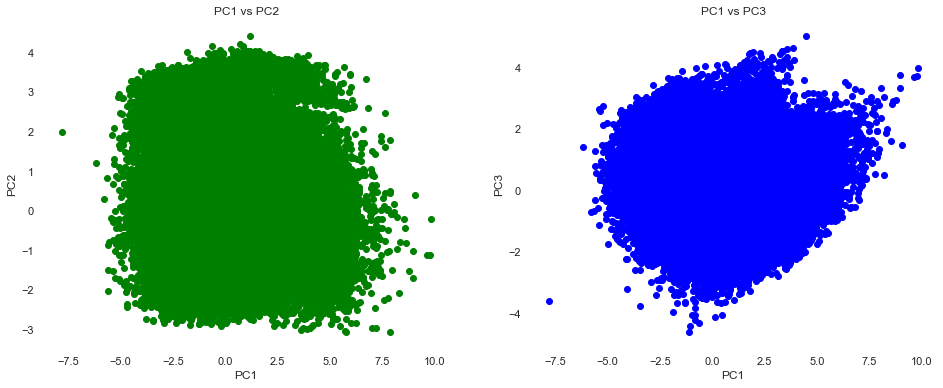

In [213]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(X_pca_au[:,0],X_pca_nine[:,1], c='green')
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_frame_on(False)
ax1.grid(True)
ax1.set_title('PC1 vs PC2')

ax2.scatter(X_pca_au[:,0],X_pca_nine[:,2], c='blue')
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC3")
ax2.set_title('PC1 vs PC3')
ax2.grid(True)
ax2.set_frame_on(False)

#### Create a new dataframe for our new PCA

In [214]:
df_pca_au = pd.DataFrame()
df_pca_au['pca-1'] = X_pca_nine[:,0]
df_pca_au['pca-2'] = X_pca_nine[:,1]
df_pca_au['y_num'] = y_num

x=df_pca_au['pca-1']
y=df_pca_au['pca-2']

#### Plot our PCA as a scatter plot

['GALAXY' 'QSO' 'STAR']


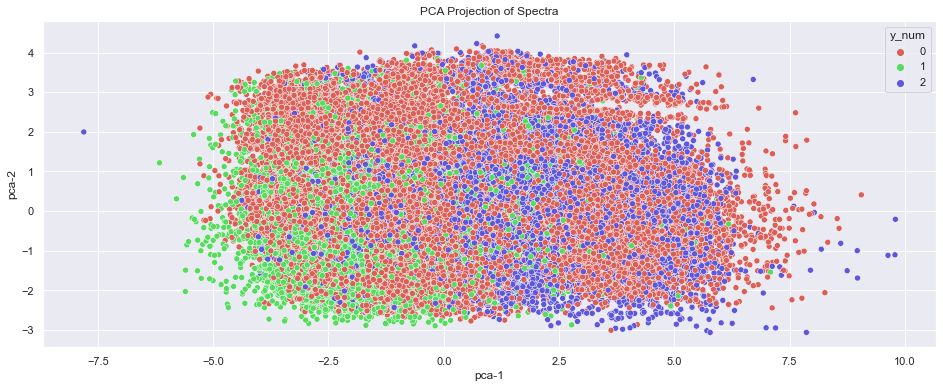

In [215]:
sns.scatterplot(x=x, 
                y=y, 
                hue='y_num', 
                data=df_pca_au,
                palette=sns.color_palette('hls',3)).set_title('PCA Projection of Spectra')
print(le.classes_)

#### Store the principal components in a new dataframe

In [216]:
df_plot_au = pd.DataFrame(X_pca_nine, columns=['alpha',
'delta','u','g','r','i','z','run_ID','cam_col'])
df_plot_au.head()

      alpha     delta         u         g         r         i         z  \
0 -0.815556 -0.319606 -0.592958  1.513534 -0.262684 -0.363460 -0.777485   
1 -3.650872 -0.512313 -0.208847 -0.333210  0.134274  0.098965 -1.029834   
2 -0.965698 -0.201673 -1.129257  1.194652 -0.631193 -0.590078 -0.366494   
3 -2.578468 -0.085065  0.967143 -0.357268 -0.659959  0.055206  1.482358   
4  2.548211 -0.440100  3.507054 -0.852351 -0.587080 -0.923877  1.068513   

     run_ID   cam_col  
0 -0.027345  0.065046  
1 -0.698054 -0.384054  
2  0.216424  0.560165  
3  0.235728 -1.508520  
4 -0.190890  0.125966  

#### Plot a scatterplot of PC1 and PC2 (used the function 'annotate')

###### use the 'class' names as markers (instead of dots).

In [187]:
dict = {'STAR':'g','GALAXY':'b', 'QSO':'r'}
#colors = ['class'[i] for i in dict]
fig,ax1 = plt.subplots()

ax1.set_xlim(X_pca_nine[:,0].min()-1,X_pca_nine[:,0].max()+1)
ax1.set_ylim(X_pca_nine[:,1].min()-1,X_pca_nine[:,1].max()+1)

for i,name in enumerate(df['class'].values):
    ax1.annotate(name,(X_pca_nine[i,0], X_pca_nine[i,1]),color=df['class'], ha='center',fontsize=5)
            
# Plot Principal Components 1 and 2
#for i,name in enumerate(df['class'].values):
 #   ax1.annotate(name, (X_pca_au[i,0], X_pca_au[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.settitle("PC1 vs PC2")
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/roannarague/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py", line 938, in set_color
    hash(color)
  File "/Users/roannarague/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py", line 1785, in __hash__
    raise TypeError(
TypeError: 'Series' objects are mutable, thus they cannot be hashed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/roannarague/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-187-0dd31c66faa4>", line 9, in <module>
    ax1.annotate(name,(X_pca_nine[i,0], X_pca_nine[i,1]),color=df['class'], ha='center',fontsize=5)
  File "/Users/roannarague/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/deprecation.py", line 315, in wrapper
    return func(*args, **kwargs)
  File "/Users/roannarag

TypeError: object of type 'NoneType' has no len()

ValueError: RGBA sequence should have length 3 or 4

<Figure size 720x432 with 1 Axes>

#### Plot a scatterplot of PC2 and PC3 (used the function 'annotate')

TODO

## t-SNE

-----

# TODO: do t-SNE on PCA components, the original data, 2d, 3d, compare PCA/t-SNE-on-PCA/t-SNE

-----

### Calculate 2D t-SNE (with Auxiliary Columns)

In [ ]:
tsne_2_aux = TSNE(n_components=2, verbose=1, random_state=37)
tsne_2d_aux = tsne_2_aux.fit_transform(X)

### Create 2D t-SNE Data Frame (with Auxiliary Columns)

In [ ]:
df_tsne_2d_aux = pd.DataFrame()
df_tsne_2d_aux['tsne-2d-1'] = tsne_2d_aux[:,0]
df_tsne_2d_aux['tsne-2d-2'] = tsne_2d_aux[:,1]
df_tsne_2d_aux['y_num'] = y_num

### Scatter Plot 2D t-SNE by Class (with Auxiliary Columns)

In [ ]:
sns.scatterplot(x='tsne-2d-1', 
                y='tsne-2d-2', 
                hue='y_num', 
                data=df_tsne_2d_aux, 
                palette=sns.color_palette('hls',3)).set_title('Scatter Plot of 2D t-SNE by Class (w/Aux)')
print(le.classes_)

-----

### Correlation Matrix With/Without Auxiliary Columns

In [ ]:
fig,axs = plt.subplots(1,2)
X_df['y_num'] = y_num

ax = sns.heatmap(X_df.corr(), center=0, vmin=-1, vmax=1, square=True, cmap=rb_diverging, ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right', rotation=45)
ax.set_title('Correlation Matrix (w/Aux)')

ax = sns.heatmap(X_df.drop(['alpha',
                            'delta',
                            'cam_col',
                            'plate',
                            'field_ID',
                            'run_ID',
                            'MJD',
                            'fiber_ID'], axis=1).corr(), 
                 center=0, 
                 vmin=-1, 
                 vmax=1, 
                 square=True, 
                 cmap=rb_diverging,
                 ax=axs[1])
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right', rotation=45)
ax.set_title('Correlation Matrix (w/o Aux)')

X_df = X_df.drop('y_num', axis=1)
print()

`plate` & `MJD` are moderately correlated with `u`, `g`, `r`, `i`, `z`, and `reshift`. The same can be said for `fiber_ID`, to a lesser degree. In addition, `alpha` and `delta` represent the location on the celestial sphere (sky), which may have a relationship with the classes of astronomical objects present, but is not an observable charateristic of the object itself. Similarly, `run_id` is the identifier of the run, which may have implications on classes observed in that run, but is not directly an attribute of the object--and likewise for `cam_col`/`field_ID`. 

As we saw with the single outlier that shaped our correlation matrix, added varaince that does not represent the underlying silhouette we are trying to capture can lead us astray--particularly when contained in a variable that has a significant correlation with a variable that does represent what we are trying to capture.

Let's examine what happens to our t-SNE dimensions when we remove these variables.



-------

### Calculate 2D t-SNE (without Auxiliary Columns)

In [ ]:
tsne_2 = TSNE(n_components=2, verbose=1, random_state=37)
tsne_2d = tsne_2.fit_transform(
    X_df.drop(['alpha',
               'delta',
               'cam_col',
               'plate',
               'field_ID',
               'run_ID',
               'MJD',
               'fiber_ID'], axis=1).to_numpy())

### Create 2D t-SNE Data Frame (without Auxiliary Columns)

In [ ]:
df_tsne_2d = pd.DataFrame()
df_tsne_2d['tsne-2d-1'] = tsne_2d[:,0]
df_tsne_2d['tsne-2d-2'] = tsne_2d[:,1]
df_tsne_2d['y_num'] = y_num

### Scatter Plot 2D t-SNE by Class (with/without Auxiliary Columns)

In [ ]:
fig,axs = plt.subplots(1,2)

sns.scatterplot(x='tsne-2d-1', 
                y='tsne-2d-2', 
                hue='y_num', 
                data=df_tsne_2d_aux, 
                palette=sns.color_palette('hls',3),
                ax=axs[0]).set_title('Scatter Plot of 2D t-SNE (w/Aux)')

sns.scatterplot(x='tsne-2d-1', 
                y='tsne-2d-2', 
                hue='y_num', 
                data=df_tsne_2d, 
                palette=sns.color_palette('hls',3),
                ax=axs[1]).set_title('Scatter Plot of 2D t-SNE (w/out Aux)')

print(le.classes_)

##### Clearly the difference is a much more coherent DImensionality Reduction, given the insight from coloring based on `class`

##### Let's validate that the variables we are considering removing/keeping.

-----

In [ ]:
X_df['class_num'] = y_num
X_df['class_num'] = X_df['class_num'].astype(int)

def KdePlot(colmn, log=False):
    for num_class in range(3):
        dat=X_df[X_df['class_num']==num_class][colmn]
        if log:
            dat=np.log(dat)
        sns.kdeplot(data=dat, 
                    label = le.inverse_transform([num_class]))
    sns.kdeplot(data=X_df[colmn],
                label = ['ALL'])
    plt.legend();

-----

## Variable vs Class Density Plots

-----

##### Let's validate that the variables we are considering removing do not appear to categorize or distinguish any of our classes

##### Conversly, let's validate that the variables we are considering keeping do appear to categorize or distinguish one or more classes

-----

In [ ]:
y.value_counts()

One thing to keep in mind, before we proceed, is that we have <strong>Class Imbalance</strong> among our classes (`GALAXY`, `STAR`, `QSO`).

This means that we should interpret the below density plots with that in mind. 

In our case, `GALAXY` has a significantly higher sample size and will therefore dominate the distribution of the `ALL` density plot.

-----

### Right Ascension (similar to longitude)
-----

In [ ]:
KdePlot('alpha')

Though not highly significant, `STAR` distinctly stands out relative to the other classes

-----

### Declination (similar to latitude)
-----

In [ ]:
KdePlot('delta')

`QSO` has a distinct profile on the rigth half of the density graph

-----

### Ultraviolet Photometric Filter
-----

In [ ]:
KdePlot('u')

`QSO` has a distinct profile and `GALAXY`/`STAR`--though not significant--may be somewhat distinguishable as well

-----

### Green Photometric Filter
-----

In [ ]:
KdePlot('g')

`QSO` has a distinct profile and `GALAXY`/`STAR`--though not significant--may be somewhat distinguishable as well

-----

### Red Photometric Filter
-----

In [ ]:
KdePlot('r')

`QSO` again has a distinct profile and `GALAXY`/`STAR` are more distinct than in the last two plots for `g` and `u`

-----

### Near Infrared Photometric Filter
-----

In [ ]:
KdePlot('i')

`QSO` continues to have the high unimodal peak; however, `STAR` is close to unimodal--in constrast to the last two plots for `g` and `r`

-----

### Infrared Photometric Filter
-----

In [ ]:
KdePlot('z')

`QSO` continues to have the high unimodal peak and `STAR` is closer to unimodal than in the higher photometric frequencies

-----

### Run Identifier for the Specific Scan
-----

In [ ]:
KdePlot('run_ID')

There is no significant distinction here and this variable should be removed

-----

### Camera Column (identifies the scanline within run)
-----

In [ ]:
KdePlot('cam_col')

There is no significant distinction here and this variable should be removed

-----

### Field ID (identifier specifying each field)
-----

In [ ]:
KdePlot('field_ID')

There is no significant distinction here and this variable should be removed

-----

### Redshift (based on the increase in wavelength)
-----

In [ ]:
KdePlot('redshift')

In [ ]:
KdePlot('redshift', log=True)

We can see that a warning was thrown and `STAR` does not appear on the log-transformed graph. This may be in part because we are dealing with the data in its already scaled form; however, <strong>we can clearly see that `redshift` distinctly characterized all three classes</strong>.

-----

### Plate (identifier of plate in SDSS)
-----

In [ ]:
KdePlot('plate')

We can see that `QSO` has a distinct profile--particularly on the right of the graph--and `STAR`/`GALAXY` on the left half of the graph.

-----

### MJD (Modified Julian Date of observation)
-----

In [ ]:
KdePlot('MJD')

The distribution for `MJD` distinctly characterizes each of the classes.

-----

### - Fiber ID (identifies the fiber pointing the light at the focal plane for the observation)
-----

In [ ]:
KdePlot('fiber_ID')

There is no significant distinction here and this variable should be removed

-----

##### Based on the above, we have validated the inclusion of all the variables we were not considering removing.

##### We will proceed with dimensionality reduction using these variables, as well as perform the same dimensionality reduction where we include the other outstanding variables from above and compare the results.

In [ ]:
X_df_aux = X_df.drop(['fiber_ID', 'field_ID', 'cam_col', 'run_ID', 'class_num'], axis=1)
X_aux = X_df_aux.to_numpy()
X_df = X_df.drop(['alpha', 'delta', 'cam_col', 'plate', 'field_ID', 
                  'run_ID', 'MJD', 'fiber_ID', 'class_num'], axis=1
                )
X = X_df.to_numpy()

------

### Calculate 3D t-SNE (with Auxiliary Columns)

In [ ]:
tsne_3_aux = TSNE(n_components=3, verbose=1, random_state=37)
tsne_3d_aux = tsne_3_aux.fit_transform(X_aux)

### Create 3D t-SNE Data Frame  (with Auxiliary Columns)

In [ ]:
df_tsne_3d_aux = pd.DataFrame()
df_tsne_3d_aux['tsne-3d-1'] = tsne_3d_aux[:,0]
df_tsne_3d_aux['tsne-3d-2'] = tsne_3d_aux[:,1]
df_tsne_3d_aux['tsne-3d-3'] = tsne_3d_aux[:,2]
df_tsne_3d_aux['y_num'] = y_num

### Scatter Plot 3D t-SNE by Class (with Auxiliary Columns)

In [ ]:
# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_tsne_3d_aux['tsne-3d-1'], 
           df_tsne_3d_aux['tsne-3d-2'],
           zs=df_tsne_3d_aux['tsne-3d-3'], 
           c=df_tsne_3d_aux['y_num'], 
           cmap=cmap_bold,
           s=1)
plt.title('Scatter Plot of 3D t-SNE by Class')
plt.legend(le.classes_) # TODO
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()
print(le.classes_)

### Calculate 3D t-SNE (without Auxiliary Columns)

In [ ]:
tsne_3 = TSNE(n_components=3, verbose=1, random_state=37)
tsne_3d = tsne_3.fit_transform(X)

### Create 3D t-SNE Data Frame (without Auxiliary Columns)

In [ ]:
df_tsne_3d = pd.DataFrame()
df_tsne_3d['tsne-3d-1'] = tsne_3d[:,0]
df_tsne_3d['tsne-3d-2'] = tsne_3d[:,1]
df_tsne_3d['tsne-3d-3'] = tsne_3d[:,2]
df_tsne_3d['y_num'] = y_num

### Scatter Plot First 2D of 3D t-SNE by Class (with/without Auxiliary Columns)

In [ ]:
fig,axs = plt.subplots(1,2)

sns.scatterplot(x='tsne-3d-1', 
                y='tsne-3d-2', 
                hue='y_num', 
                data=df_tsne_3d_aux,
                palette=sns.color_palette('hls',3),
                ax=axs[0]).set_title('Scatter first 2D (of 3D) t-SNE (w/Aux)')

sns.scatterplot(x='tsne-3d-1', 
                y='tsne-3d-2', 
                hue='y_num', 
                data=df_tsne_3d,
                palette=sns.color_palette('hls',3),
                ax=axs[1]).set_title('Scatter first 2D (of 3D) t-SNE (w/out Aux)')

print(le.classes_)

TODO: interpretation

### Scatter Plot 3D t-SNE by Class (with/without Auxiliary Columns)

In [ ]:
# 3D scatter plot of 3D t-SNE
def PlotSingle3DtSNE(ttle, df):
    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(df['tsne-3d-1'], 
               df['tsne-3d-2'],
               zs=df['tsne-3d-3'], 
               c=df['y_num'], 
               cmap=cmap_bold,
               label=le.inverse_transform,
               s=1
              )
    plt.title(ttle)
    plt.legend(le.classes_) # TODO
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    return ax

------

In [ ]:
PlotSingle3DtSNE('Scatter 3D t-SNE (w/Aux)', df_tsne_3d_aux)
print()

In [ ]:
PlotSingle3DtSNE('Scatter 3D t-SNE (w/o Aux)', df_tsne_3d)
print()

TODO: interpretation

In [ ]:
# 3D scatter plot of 3D t-SNE (100% vs 10% alpha)
def Plot3DtSNE_df(ttle='title', df1=None, azm=-60, elv=30):
    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(df1['tsne-3d-1'], 
               df1['tsne-3d-2'],
               zs=df1['tsne-3d-3'], 
               c=df1['y_num'], 
               cmap=cmap_bold,
               label=le.inverse_transform,
               s=1
              )
    plt.title(ttle)
    plt.legend(le.classes_) # TODO
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.azim = azm
    ax.elev = elv
    
    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(df1['tsne-3d-1'], 
               df1['tsne-3d-2'],
               zs=df1['tsne-3d-3'], 
               c=df1['y_num'], 
               cmap=cmap_bold,
               label=le.inverse_transform,
               s=1,
               alpha=0.1
              )
    plt.title(ttle)
    plt.legend(le.classes_) # TODO
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.azim = azm
    ax.elev = elv
    return ax

-----

-----

In [ ]:
cmap_bold

In [ ]:
#     GALAXY                   QSO                     STAR

-----

----- 
`alpha`, `delta`, `u`, `g`, `r`, `i`, `z`, `redshift`, `plate`, `MJD`
-----

-----

----- 
`u`, `g`, `r`, `i`, `z`, `redshift`
-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (30 deg CCW, w/Aux)', df_tsne_3d_aux, -90)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (30 deg CCW, w/o Aux)', df_tsne_3d, -90)
print()

----- 
`alpha`, `delta`, `u`, `g`, `r`, `i`, `z`, `redshift`, `plate`, `MJD`
-----

-----

----- 
`u`, `g`, `r`, `i`, `z`, `redshift`
-----

-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (w/Aux)', df_tsne_3d_aux)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (w/o Aux)', df_tsne_3d)
print()

----- 
`alpha`, `delta`, `u`, `g`, `r`, `i`, `z`, `redshift`, `plate`, `MJD`
-----

-----

----- 
`u`, `g`, `r`, `i`, `z`, `redshift`
-----

-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (30 CW, w/Aux )', df_tsne_3d_aux, -30)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (30 CW, w/o Aux)', df_tsne_3d, -30)
print()

----- 
`alpha`, `delta`, `u`, `g`, `r`, `i`, `z`, `redshift`, `plate`, `MJD`
-----

-----

----- 
`u`, `g`, `r`, `i`, `z`, `redshift`
-----

-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (50 deg CW, w/Aux)', df_tsne_3d_aux, -10)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (50 deg clockwise)', df_tsne_3d, -10)
print()

----- 
`alpha`, `delta`, `u`, `g`, `r`, `i`, `z`, `redshift`, `plate`, `MJD`
-----

-----

----- 
`u`, `g`, `r`, `i`, `z`, `redshift`
-----

-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (90 deg CW, w/Aux)', df_tsne_3d_aux, 30)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (90 deg CW, w/o Aux)', df_tsne_3d, 30)
print()

----- 
`alpha`, `delta`, `u`, `g`, `r`, `i`, `z`, `redshift`, `plate`, `MJD`
-----

-----

----- 
`u`, `g`, `r`, `i`, `z`, `redshift`
-----

-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (140 deg CW, w/Aux)', df_tsne_3d_aux, 80)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (140 deg CW, w/o Aux)', df_tsne_3d, 80)
print()

----- 
`alpha`, `delta`, `u`, `g`, `r`, `i`, `z`, `redshift`, `plate`, `MJD`
-----

-----

----- 
`u`, `g`, `r`, `i`, `z`, `redshift`
-----

-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (180 deg CW, w/Aux)', df_tsne_3d_aux, 120)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (180 deg CW, w/o Aux)', df_tsne_3d, 120)
print()

----- 
`alpha`, `delta`, `u`, `g`, `r`, `i`, `z`, `redshift`, `plate`, `MJD`
-----

-----

----- 
`u`, `g`, `r`, `i`, `z`, `redshift`
-----

-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (220 deg CW, w/Aux)', df_tsne_3d_aux, 160)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (220 deg CW, w/o Aux)', df_tsne_3d, 160)
print()

----- 
`alpha`, `delta`, `u`, `g`, `r`, `i`, `z`, `redshift`, `plate`, `MJD`
-----

-----

----- 
`u`, `g`, `r`, `i`, `z`, `redshift`
-----

-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (270 deg CW, w/Aux)', df_tsne_3d_aux, 210)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (270 deg CW, w/o Aux)', df_tsne_3d, 210)
print()

----- 
`alpha`, `delta`, `u`, `g`, `r`, `i`, `z`, `redshift`, `plate`, `MJD`
-----

-----

----- 
`u`, `g`, `r`, `i`, `z`, `redshift`
-----

-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (270 deg CW, w/Aux)', df_tsne_3d_aux, 210, 0)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (270 deg CW, w/o Aux)', df_tsne_3d, 210, 0)
print()

TODO: interpretation

- `g`
    - green filter (photometric system)
- `z`
    - infrared filter (photometric system)

In [ ]:
sns.scatterplot(x='g', y='z', data=df, hue=df['class'], alpha=.002)

# Interesting ring of QSO around the STAR cluster

In [ ]:
X_df_aux

-----

----- 
`alpha`, `delta`, `u`, `g`, `r`, `i`, `z`, `redshift`, `plate`, `MJD`
-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (30 deg CCW, w/Aux)', df_tsne_3d_aux, -90)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (w/Aux)', df_tsne_3d_aux)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (30 CW, w/Aux )', df_tsne_3d_aux, -30)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (50 deg CW, w/Aux)', df_tsne_3d_aux, -10)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (90 deg CW, w/Aux)', df_tsne_3d_aux, 30)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (140 deg CW, w/Aux)', df_tsne_3d_aux, 80)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (180 deg CW, w/Aux)', df_tsne_3d_aux, 120)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (220 deg CW, w/Aux)', df_tsne_3d_aux, 160)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (270 deg CW, w/Aux)', df_tsne_3d_aux, 210)
print()

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (270 deg CW, w/Aux)', df_tsne_3d_aux, 210, 0)
print()

-----

-----

-----

----- 
`u`, `g`, `r`, `i`, `z`, `redshift`
-----

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (30 deg CCW, w/o Aux)', df_tsne_3d, -90)
print()

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (w/o Aux)', df_tsne_3d)
print()

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (30 CW, w/o Aux)', df_tsne_3d, -30)
print()

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (50 deg clockwise)', df_tsne_3d, -10)
print()

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (90 deg CW, w/o Aux)', df_tsne_3d, 30)
print()

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (140 deg CW, w/o Aux)', df_tsne_3d, 80)
print()

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (180 deg CW, w/o Aux)', df_tsne_3d, 120)
print()

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (220 deg CW, w/o Aux)', df_tsne_3d, 160)
print()

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (270 deg CW, w/o Aux)', df_tsne_3d, 210)
print()

-----

In [ ]:
Plot3DtSNE_df('Scatter 3D t-SNE (270 deg CW, w/o Aux)', df_tsne_3d, 210, 0)
print()

TODO: interpretation

-----

In [ ]:
X_aux = pd.DataFrameme(X).to_numpy()
X = X_df.drop(['alpha',
               'delta',
               'cam_col',
               'plate',
               'field_ID',
               'run_ID',
               'MJD',
               'fiber_ID'], axis=1).to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
fold = StratifiedKFold(n_splits=5, random_state=37, shuffle=True)

In [ ]:
rfc = RandomForestClassifier()
score = cross_val_score(rfc, X, y, cv=fold)
score

In [ ]:
metrics.accuracy_score()

-----

-----

# Preliminary Results

Exploratory clustering as an initial pass over our data, but we have not done qualifying clustering yet. We have not checked for outliers; we have not mitigated any class imbalance or dimensionality reduction to remove unimportant variables that might cause noise, and we have not cross validated yet.

In [ ]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

**How do you choose K?** Ideas:

1. Visual comparison.
2. Looking for at which $k$ the total intra-cluster distance tapers off. 
3. [Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

The first method is useful when the feature vectors are lower dimensional, but it's difficult to visualize data in higher dimensions. Let's consider the other two ideas.

### Analyzing Change in Intra-Cluster Distance

We can run K-Means for different Ks and plot the intra-cluster distance. 

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./data_acquisition/Python/final_combined_QSO_1.csv')
df = df.loc[:,'plate':'fiber_ID']
df.head(1)

## Are there any NaN's

In [ ]:
df.isna().sum()

# Check data types

In [ ]:
df.dtypes

------------

## Encode `class`

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder().fit(df['class'])
df['class_num'] = le.transform(df['class'])
df.tail().loc[:,['class','class_num']]

----------

# Look at other variables

In [ ]:
df.dtypes

----------

# Modified Julian Date (MJD)

In [ ]:
df.MJD.min()

In [ ]:
march_2000 = 51603  #https://core2.gsfc.nasa.gov/time/mjd2000.html

In [ ]:
(df.MJD.max() - df.MJD.min()) / 365.25

## Roughly March 2000 through Mid-2020

## Drop for now to simplifiy exploratory clustering

In [ ]:
df = df.drop(['class', 'spec_obj_ID', 'obj_ID', 'MJD'], axis=1)
df.dtypes

## k-means

In [ ]:
# clustering for k = 1 to k = 10
ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))
# fig, axs = plt.subplots(1,1)

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(df.drop(['class_num'],axis=1).values)
    scores.append(-model.score(df.drop(['class_num'],axis=1)))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(x='alpha', y='delta', c=y_pred, data=df,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))

    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

# Base-Truth is k=3, elbow appears to be 3 or 4

# Rerun with less columns

In [ ]:
df.columns

## k-means

In [ ]:
# clustering for k = 1 to k = 10
ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))
# fig, axs = plt.subplots(1,1)

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(df.drop(['run_ID', 'rerun_ID', 
                                        'cam_col', 'field_ID', 
                                        'fiber_ID', 'class_num'],axis=1).values)
    scores.append(-model.score(df.drop(['run_ID', 'rerun_ID', 
                                        'cam_col', 'field_ID', 
                                        'fiber_ID', 'class_num'],axis=1)))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(x='alpha', y='delta', c=y_pred, data=df,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))

    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

# Elbow is more distinctly k=3 (Base-Truth) 
### Removed variables resulted in ~ order of magnitude less intra-cluster distance at k=3 than before

In [ ]:
df = df.drop(['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID'],axis=1)
df.head(1)

----------

# Silhouette plot

In [ ]:
d = df.drop('class_num', axis=1).values
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(d) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(d, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(d[:, 3], d[:, 4], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 3], centers[:, 4], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[3], c[4], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# `ra` x `dec` visualization also indicates we are look at mostly the northern--relative to the celestial sphere--sky?

In [ ]:
df.columns

In [ ]:
import seaborn as sns

# Ground Truth ('GALAXY', 'STAR', 'QSO')

In [ ]:
xx = df
xx['class'] = le.classes_[xx['class_num']]
xx.head(2)

# Position view (x=`ra`, y=`dec`)

In [ ]:
sns.scatterplot(x='alpha', y='delta', hue='class', alpha=.5, data=xx)

In [ ]:
sns.scatterplot(x='alpha', y='delta', hue='class', alpha=.05, data=xx)

In [ ]:
sns.scatterplot(x='alpha', y='delta', hue='class', alpha=.005, data=xx)

In [ ]:
sns.pairplot(xx, hue='class')

In [ ]:
sns.scatterplot(x='i', y='r', data=xx, hue=df['class'].values, alpha=.15)

In [ ]:
sns.scatterplot(x='i', y='r', data=xx, hue=df['class'].values, alpha=.002)

In [ ]:
sns.scatterplot(x='redshift', y='z', data=xx, hue=xx['class'], alpha=.15)

In [ ]:
sns.scatterplot(x='redshift', y='z', data=xx, hue=xx['class'], alpha=.025)

In [ ]:
sns.scatterplot(x='g', y='z', data=xx, hue=df['class'], alpha=.15)

In [ ]:
sns.scatterplot(x='g', y='z', data=xx, hue=df['class'], alpha=.002)

# Interesting ring of QSO around the STAR cluster

# class imbalance and outliers may be contributing to low quality of clustering prediction vs base-truth

In [ ]:
df['class'].value_counts()

In [ ]:
df = pd.read_csv('./data/optical_spectroscopic_object_classification.csv')
df.head(1)

## Check for NaN's & Verify data types

In [ ]:
df.info()# Check for NaN's & Verify data types

------------

## Encode `class`

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# hold on to le to allow easy decoding as needed
le = LabelEncoder().fit(df['class'])
df['class_num'] = le.transform(df['class'])
df.tail(9).loc[:,['class','class_num']]

--------

## Check for Outliers

https://scikit-learn.org/stable/modules/outlier_detection.html

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
oif = IsolationForest()
oif_y_pred = oif.fit_predict(df.drop('class', axis=1))

In [ ]:
(oif_y_pred==-1).sum()

In [ ]:
lof = LocalOutlierFactor()
lof_y_pred = lof.fit_predict(df.drop('class', axis=1))

In [ ]:
x_score = lof.negative_outlier_factor_
outlier_score = pd.DataFrame({'score':x_score})
outlier_score['score'].describe()

In [ ]:
(outlier_score < -2).sum()

In [ ]:
(outlier_score < -1).sum()

In [ ]:
(outlier_score > -1).sum()

In [ ]:
(outlier_score < -1.5).sum()

# TODO: Try outlier score on each class individually

--------

## Look for class imbalance

In [ ]:
sns.countplot(x='class', data=df).set_title('Class Distribution')
df['class'].value_counts()

--------

## Mitigate class imbalance

In [ ]:
from sklearn.

In [ ]:
df['class'].value_counts()

----------

# Look at other variables

In [ ]:
df.dtypes

----------

# Modified Julian Date (MJD)

In [ ]:
df.MJD.min()

In [ ]:
march_2000 = 51603  #https://core2.gsfc.nasa.gov/time/mjd2000.html

In [ ]:
(df.MJD.max() - df.MJD.min()) / 365.25

## Roughly March 2000 through Mid-2020

----------

## Look at 

In [ ]:
df.corr()['class_num'].sort_values()

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df = df.drop(['class', 'spec_obj_ID', 'obj_ID', 'MJD'], axis=1)
df.dtypes

## k-means

In [ ]:
# clustering for k = 1 to k = 10
ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))
# fig, axs = plt.subplots(1,1)

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(df.drop(['class_num'],axis=1).values)
    scores.append(-model.score(df.drop(['class_num'],axis=1)))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(x='alpha', y='delta', c=y_pred, data=df,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))

    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

# Base-Truth is k=3, elbow appears to be 3 or 4

# Rerun with less columns

In [ ]:
df.columns

In [ ]:
df.corr()

In [ ]:
df.rerun_ID.value_counts()

#### `rerun_ID` is always 301 in this dataset, which means it contains no information regarding `class` and can be dropped

In [ ]:
# df = df.drop('rerun_ID', axis=1)

In [ ]:
# sns.heatmap(df.corr())

## k-means

In [ ]:
# clustering for k = 1 to k = 10
ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))
# fig, axs = plt.subplots(1,1)

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(df.drop(['run_ID', 'rerun_ID', 
                                        'cam_col', 'field_ID', 
                                        'fiber_ID', 'class_num'],axis=1).values)
    scores.append(-model.score(df.drop(['run_ID', 'rerun_ID', 
                                        'cam_col', 'field_ID', 
                                        'fiber_ID', 'class_num'],axis=1)))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(x='alpha', y='delta', c=y_pred, data=df,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))

    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

# Elbow is more distinctly k=3 (Base-Truth) 
### Removed variables resulted in ~ order of magnitude less intra-cluster distance at k=3 than before

In [ ]:
df = df.drop(['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID'],axis=1)
df.head(1)

----------

# Silhouette plot

In [ ]:
d = df.drop('class_num', axis=1).values
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(d) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(d, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(d[:, 3], d[:, 4], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 3], centers[:, 4], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[3], c[4], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# `ra` x `dec` visualization also indicates we are look at mostly the northern--relative to the celestial sphere--sky?

In [ ]:
df.columns

# Ground Truth ('GALAXY', 'STAR', 'QSO')

In [ ]:
xx = df
xx['class'] = le.classes_[xx['class_num']]
xx.head(2)

# Position view (x=`ra`, y=`dec`)

In [ ]:
sns.scatterplot(x='alpha', y='delta', hue='class', alpha=.5, data=xx)

In [ ]:
sns.scatterplot(x='alpha', y='delta', hue='class', alpha=.05, data=xx)

In [ ]:
sns.scatterplot(x='alpha', y='delta', hue='class', alpha=.005, data=xx)

In [ ]:
sns.pairplot(xx, hue='class')

In [ ]:
sns.scatterplot(x='i', y='r', data=xx, hue=df['class'].values, alpha=.15)

In [ ]:
sns.scatterplot(x='i', y='r', data=xx, hue=df['class'].values, alpha=.002)

In [ ]:
sns.scatterplot(x='redshift', y='z', data=xx, hue=xx['class'], alpha=.15)

In [ ]:
sns.scatterplot(x='redshift', y='z', data=xx, hue=xx['class'], alpha=.025)

In [ ]:
sns.scatterplot(x='g', y='z', data=xx, hue=df['class'], alpha=.15)

In [ ]:
sns.scatterplot(x='g', y='z', data=xx, hue=df['class'], alpha=.002)

# Interesting ring of QSO around the STAR cluster

# class imbalance and outliers may be contributing to low quality of clustering prediction vs base-truth

In [ ]:
df['class'].value_counts()

-----

------

# Peer Feedback

Our peer feedback answered the following questions: 

Are the objectives interesting and suitable for a class project? <strong>-- yes</strong>

Is the scope of the project appropriate? If not, suggest improvements. **-- yes. It was mentioned that we should consider data classifications changing over time given that over time there have been higher resolution telescopes/cameras, better technology that could change the outcome classification of an astronomical object. If we were to create this model now how accurate would it be in the future?**  

Is the split between optional and must-have features appropriate? Why? **-- yes**

Is the stakeholder analysis comprehensive? Are there specific ethical issues? **-- something to consider is why some data is classified as a quasar and then as a galaxy/star. As mentioned above, the classification rules change over time. Get a percentage of how many astronomical objects were later classified as quasar instead of a star/galaxy.** 

Data Acquisition and Cleanup 

Is data acquisition realistic? **-- with .fits files it was not realistic, with web-scraping we got closer with acquiring the data and finally with using SDSS’s query/crossmatch/SQL tools we were able to realistically retrieve the data.** 

Is the data acquisition trivial (e.g., downloading an existing dataset). Does the rest of the project compensate? **-- not it was not trivial, and the rest of the project does compensate.**  

What is the plan for cleanup? Is cleanup that goes beyond what was taught in class necessary? 

**The cleanup plan involves combining CSVs, adjusting some of the classifications from galaxy/star to quasar if the “spec_obj_id” aligns with the quasar dataset. Removing duplicate header rows and validating we have balanced data.**  

Is there enough data to accomplish the stated objectives? 

**Yes. Instructor (Bei Wang) indicated that ~100,000 data points is a sufficient starting point** 

**If needed, more data points can be acquired using the same methods we used to acquire our working dataset.**

Are there other variables that are not being modeled that have a strong effect on the problem? **-- at this moment in time, this is unknown. The hope is our model might be able to tell us which variables have a strong effect on the problem.**  

Analysis Methodology 

Does the analysis methodology work for the data? E.g., for supervised learning - is the data labeled? 

**Yes, supervised learning with labeled data** 

Would other analysis methods be appropriate? 

**Yes, Bayesian Models could also be appropriate** 

**--Instructor (Haoyu Chen) feedback was to optionally consider adding methods from Bayesian Models for Astrophysical Data by Hilbe, Souza, and Ishida 
**
Yes, t-SNE may be appropriate for Dimensionality Reduction/Visualization**

--Instructor (Bei Wang) feedback 

**”Visualization in Astrophysics: Developing New Methods, Discovering Our Universe, and Educating the Earth” - Bei Wang, et al**

**CNN could also be a potential option, as “Kim and Brunner [KB16] performed star-galaxy classification using CNNs”** 

Is the scale of the dataset sufficient for the analysis methodology? 

**Yes. Instructor (Bei Wang) indicated that ~100,000 data points is a sufficient starting point. More data points can be acquired as needed.** 

-----

-----

# Completed Milestones

- Determining the proper method for retrieving our dataset 

- Acquiring our dataset (retrieving 100,000 objects) 

- Validating our dataset had at least a portion of our three classification types: Galaxy, Star, Quasar 

- Getting a final, useable CSV file to perform and build our model with 

- Initial data analysis of the final dataset (clustering) 

-----

-----


# Upcoming Milestones

- Check for class imbalance and outliers 

- Perform the rest of the analysis methods on the data: 

- Classification (SVM, K-means) 

- Dimensionality Reduction (PCA/LDA) 

-----

-----

# Potential Modificaiton to the Project

How do we check if our data is linear? So first we should do some kind check to verify whether our data is linear or nonlinear. If the data is nonlinear, we will have to switch our methods from LDA and PCA to t-SNE and UMAP.  We originally planned to mitigate outliers before dimensionality reduction, we are now of the opinion it would be best to run dimensionality reduction with and without outliers and then compare the results of both. Along these same lines, we originally planned to center/scale the data before clustering, but now we are going to center/scale and then cluster and then not center/scale and compare the results.  

-----

-----

# Project Summary:  

Overall, our project is on track, and we have followed our original milestones that we set at the beginning of the class. We initially ran into some roadblocks at the start when trying to acquire the appropriate data and acquiring in a way that made sense and was not so cumbersome. Once those roadblocks were surpassed, we are now able to view and understand our final dataset to perform our final data analysis and all the methods we listed to create a model to accurately predict an astronomical object based on the data we feed into it.  

-----

-----

# Assessment

Is our project on track: **yes**